<a href="https://colab.research.google.com/github/ganeshbmc/MLP/blob/main/MLP_OPE_2_21f1006171.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP OPPE 2 Examination

In [1]:
from google.colab import files
uploaded = files.upload()

Saving v3.csv to v3.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('v3.csv')
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,med,low,2,6,med,low,unacc
1,vhigh,vhigh,4,2,med,med,unacc
2,vhigh,high,3,4,big,med,unacc
3,high,low,4,6,big,med,acc
4,vhigh,vhigh,4,2,big,high,unacc


In [4]:
df.shape

(1500, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1493 non-null   object
 1   Maint       1500 non-null   object
 2   Doors       1500 non-null   int64 
 3   Persons     1500 non-null   int64 
 4   Lug_boot    1500 non-null   object
 5   Safety      1500 non-null   object
 6   Evaluation  1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


## Que 1

Ans: 'c'   
v3 dataset

## Que 2

In [5]:
df.isna().sum()

Buying        7
Maint         0
Doors         0
Persons       0
Lug_boot      0
Safety        0
Evaluation    0
dtype: int64

## Que 3

In [7]:
df['Lug_boot'].unique()

array(['med', 'big', 'small'], dtype=object)

## Que 4

In [8]:
df.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Evaluation'],
      dtype='object')

In [12]:
X = df[['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']]
y = df['Evaluation']
X.shape, y.shape

((1500, 6), (1500,))

In [13]:
X.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,med,low,2,6,med,low
1,vhigh,vhigh,4,2,med,med
2,vhigh,high,3,4,big,med
3,high,low,4,6,big,med
4,vhigh,vhigh,4,2,big,high


In [14]:
y[:5]

0    unacc
1    unacc
2    unacc
3      acc
4    unacc
Name: Evaluation, dtype: object

In [15]:
np.unique(y, return_counts=True)

(array(['acc', 'good', 'unacc', 'vgood'], dtype=object),
 array([ 317,   65, 1058,   60]))

## Que 5

In [16]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
X_tr = si.fit_transform(X)
X_tr.shape

(1500, 6)

In [17]:
type(X_tr)

numpy.ndarray

## Que 6

In [18]:
X.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'], dtype='object')

In [26]:
cols = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
X_df = pd.DataFrame(X_tr, columns=cols)
X_df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,med,low,2,6,med,low
1,vhigh,vhigh,4,2,med,med
2,vhigh,high,3,4,big,med
3,high,low,4,6,big,med
4,vhigh,vhigh,4,2,big,high


In [27]:
X_df.shape

(1500, 6)

In [28]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1500 non-null   object
 1   Maint     1500 non-null   object
 2   Doors     1500 non-null   object
 3   Persons   1500 non-null   object
 4   Lug_boot  1500 non-null   object
 5   Safety    1500 non-null   object
dtypes: object(6)
memory usage: 70.4+ KB


In [29]:
X_df.isna().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
dtype: int64

In [25]:
# ?pd.DataFrame

## Que 7

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

cf = ['Buying', 'Maint', 'Lug_boot', 'Safety']
nf = ['Doors', 'Persons']

X1 = ohe.fit_transform(X_df[cf])
X2 = ss.fit_transform(X_df[nf])

type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [32]:
X1.shape, X2.shape

((1500, 14), (1500, 2))

## Que 8

In [31]:
X = np.concatenate((X1, X2), axis=1)
X.shape

(1500, 16)

In [33]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.348383,1.244154
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.451061,-1.208186
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.448661,0.017984
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.451061,1.244154
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.451061,-1.208186


In [35]:
type(X)

pandas.core.frame.DataFrame

In [34]:
X.shape

(1500, 16)

## Que 9

In [39]:
X.shape, y.shape

((1500, 16), (1500,))

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1200, 16), (300, 16), (1200,), (300,))

## Que 10

In [40]:
from sklearn.linear_model import Perceptron
pcp = Perceptron(random_state=32,
                 eta0=1,
                 max_iter=10,
                 shuffle=False,
                 validation_fraction=0.2,
                 fit_intercept=True,
                 warm_start=False,
                 penalty=None)
pcp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(eta0=1, max_iter=10, random_state=32, shuffle=False,
           validation_fraction=0.2)

In [43]:
y.unique()

array(['unacc', 'acc', 'good', 'vgood'], dtype=object)

In [42]:
pcp.coef_.shape

(4, 16)

In [44]:
pcp.coef_[0][1]

-1.0

## Que 11

In [49]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=32,
                     loss='log',
                     penalty='l2',
                     max_iter=10,
                     eta0=0.01,
                     learning_rate='constant',
                     alpha=0.001)
sgdc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=10, random_state=32)

In [50]:
sgdc.score(x_train, y_train)

0.795

In [51]:
?sgdc

## Que 12

## REVISIT  

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_reg = LogisticRegression(random_state=32,
                             tol=1e-2,
                             solver='saga',
                             max_iter=200)
pd = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
    }
RandCV = RandomizedSearchCV(log_reg,
                            param_distributions=pd,
                            random_state=32)
RandCV.fit(x_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=32,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5,
                                              4],
                                        'penalty': ['l1', 'l2']},
                   random_state=32)

In [56]:
RandCV.best_params_

{'C': 1.5, 'penalty': 'l1'}

## Que 13

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svcc = SVC(random_state=32)
pg = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10]
}
gridCV = GridSearchCV(svcc,
                      param_grid=pg)
gridCV.fit(x_train, y_train)


GridSearchCV(estimator=SVC(random_state=32),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [59]:
gridCV.best_params_

{'C': 10, 'kernel': 'rbf'}

## Que 14

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knnc = KNeighborsClassifier(metric='minkowski',
                            p=2)
pg_knn = {
    'n_neighbors': [1,3,5,7]
}
gridKNN = GridSearchCV(knnc,
                       param_grid=pg_knn,
                       scoring='accuracy',
                       cv=4)
gridKNN.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [61]:
gridKNN.best_params_

{'n_neighbors': 3}

## Que 15

In [62]:
gridKNN.best_score_

0.9091666666666667

## Que 16

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',
                             splitter='random',
                             min_samples_split=5,
                             min_impurity_decrease=0.001,
                             random_state=32)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001, min_samples_split=5,
                       random_state=32, splitter='random')

In [65]:
dtc.score(x_test, y_test)

0.9466666666666667

In [67]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, dtc.predict(x_test))

0.9466666666666667

In [68]:
print(classification_report(y_test, dtc.predict(x_test)))

              precision    recall  f1-score   support

         acc       0.88      0.95      0.91        74
        good       0.76      0.76      0.76        17
       unacc       0.99      0.97      0.98       196
       vgood       1.00      0.85      0.92        13

    accuracy                           0.95       300
   macro avg       0.91      0.88      0.89       300
weighted avg       0.95      0.95      0.95       300



## Que 17

In [70]:
dtc.get_depth()

11

## Que 18

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc)

**Text(0.7799202127659575, 0.875, 'X[12] <= 0.835\ngini = 0.574\nsamples = 782\nvalue = [243, 48, 444, 47]')**

Text(0.7799202127659575, 0.875, 'X[12] <= 0.835\ngini = 0.574\nsamples = 782\nvalue = [243, 48, 444, 47]')

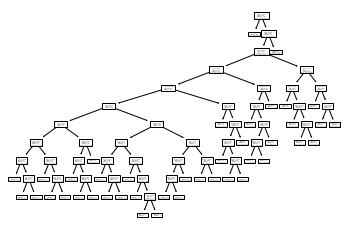

In [76]:
plot_tree(dtc)[2]

## Que 19

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=32,
                             )
pg_rfc = {
    'n_estimators': [10,11,12,13,14,15]
}

gridRFC = GridSearchCV(rfc,
                       param_grid=pg_rfc)
gridRFC.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=32),
             param_grid={'n_estimators': [10, 11, 12, 13, 14, 15]})

In [79]:
gridRFC.best_params_

{'n_estimators': 12}

## Que 20

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

log_reg2 = LogisticRegression(random_state=32)
svcc2 = SVC(random_state=32)
knnc2 = KNeighborsClassifier()
dtc2 = DecisionTreeClassifier(random_state=32)

base_estimator_list = [log_reg2, svcc2, knnc2, dtc2]

In [88]:
def get_score(x_train, y_train, 
              x_test, y_test,
              base_estimator, 
              n_estimators=15,
              random_state=32):
  bgc = BaggingClassifier(base_estimator=base_estimator,
                          n_estimators=n_estimators,
                          random_state=random_state)
  bgc.fit(x_train, y_train)
  mean_acc_score = bgc.score(x_test, y_test)
  return mean_acc_score

In [90]:
print(f"The scores on TEST SET are:\n")
for base_estimator in base_estimator_list:
  score = get_score(x_train, y_train, x_test, y_test,
            base_estimator)
  print(f"Mean accuracy score of {base_estimator} is {score}")

The scores on TEST SET are:

Mean accuracy score of LogisticRegression(random_state=32) is 0.8166666666666667
Mean accuracy score of SVC(random_state=32) is 0.98
Mean accuracy score of KNeighborsClassifier() is 0.93
Mean accuracy score of DecisionTreeClassifier(random_state=32) is 0.9733333333333334
